# Cell plan selection research 

## Let's open the data file and examine the information. 
Libraries' import:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Open the first table and save it as a dataframe `calls`

In [2]:
calls=pd.read_csv('calls.csv')

Now let's take a quick look at the dataframe

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


No missing values. Let's look at the distrubution of a call duration

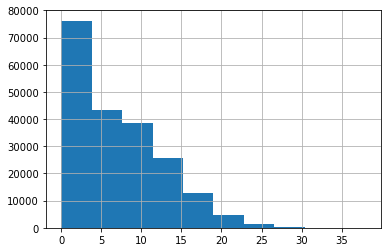

In [5]:
calls['duration'].hist();

Most of the calls have taken les than 5 minutes. We'll get to this point later. Also zero-duration calls were found in the data. This is not an error: the zeros indicate missed calls, so there is no need to delete them.

Open the `internet` table and save it as a dataframe `sessions`

In [6]:
sessions=pd.read_csv('internet.csv')

And evaluate the main information:

In [7]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


and take a look at the distribution of consumed internet data

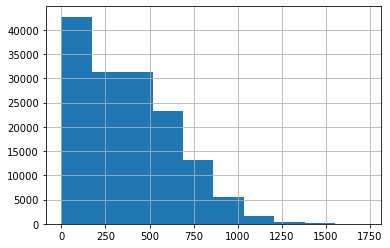

In [9]:
sessions['mb_used'].hist();

The clients do not seem to comsume a lot of data per each session.

Now, we can repeat the applied procedure to the `messages` table

In [10]:
messages=pd.read_csv('messages.csv')

In [11]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Now we can evaluate the `tariffs` table. We have two plans available for the customers: `smart` and `ultra`

In [13]:
tariffs=pd.read_csv('tariffs.csv')

In [14]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


What plans are offered?

In [15]:
print(tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


Now, let's the open `users` table and save it in a pandas dataframe:

In [16]:
users=pd.read_csv('users.csv')

Let's look at the dataframe. Please, keep in mind, that the names and cities are given in Russian

In [17]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Data preprocessing

Let's convert the columns `reg_date`, `churn_date`, `call_date`, `message_date`, and `session_date` from their respective tables to a common data type using the to_datetime() method.

In [19]:
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date']= pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
sessions['session_date']=pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

In the column `duration` of the `calls` dataframe, the values are decimal numbers. Let's round up the values in the `duration` column using the numpy.ceil() method and convert the "duration" column to the int data type.

In [20]:
calls['duration']=np.ceil(calls['duration']).astype('int')

Additionally, let's remove the `Unnamed: 0` column of `sessions` dataframe. This column appears when data is saved with an index specified (df.to_csv(..., index=column)). It is not needed at the moment.

In [21]:
sessions=sessions.drop(columns=['Unnamed: 0'])

To estimate the monthly usage of minutes and text messages, let's create a `month` column in each corresponding dataframe.

In [22]:
calls['month']=calls['call_date'].dt.month
messages['month']=messages['message_date'].dt.month
sessions['month']=sessions['session_date'].dt.month

Now we can calculate the number of outgoing calls made by each user per month, creating a separate dataframe `calls_per_month`

In [23]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [24]:
calls_per_month.head(10)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63

Now let's calculate the total number of minutes used for each user per month and save it in the variable "minutes_per_month". We will need to:

- Group the dataframe containing call information by two columns: user IDs and month numbers.
- After grouping, select the "duration" column.
- Calculate the sum of the durations.


In [25]:
minutes_per_month= calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
minutes_per_month.head(10)


minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414

And now we apply the same procedure to calculate the number of messagies per month

In [26]:
messages_per_month= messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))
messages_per_month.head(10) 

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

Now calculate the data comsumed (in Mb) per month

In [27]:
sessions_per_month=sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
sessions_per_month.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

### Formulating the hypothesis

Based on the preprocessing and preliminary data evaluation, we offer two hypothesis:

- Average revenue of "Ultra" and "Smart" plans users are different.
- Users from Moscow generate more revenue than users from other cities

## Exploratory data analysis

Let's combine all the calculated values mentioned above into one dataframe called `user_behavior`. For each `user-month` pair, information about the tariff, number of calls, messages, and consumed megabytes will be available.

In [28]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Only 7.6% of the users have left the cell phone provider. 

In [29]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Let's check the missing values, and fill them with 0

In [30]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [31]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Now let's add the information on selected plans, using `tariff` column:

In [32]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

user_behavior = user_behavior.merge(tariffs, on='tariff')

Let's convert the exceeded megabytes into gigabytes and save it in the column "paid_gb."

In [33]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Now calculate the revenue for calls, messages, and internet usage.  

In [34]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

And a monthly revenue per customer:

In [35]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Now let's create a dataframe called `stats_df` to store key statistics for each "month-plan" pair.

In [36]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Now let's examine the distribution of the average number of calls across different tariff plans and months, as well as the duration of voice calls.

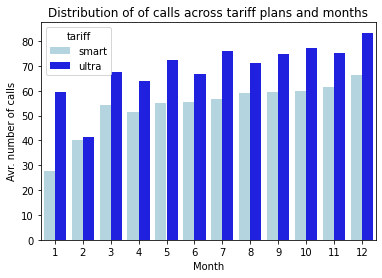

In [37]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of of calls across tariff plans and months')
ax.set(xlabel='Month', ylabel='Avr. number of calls');

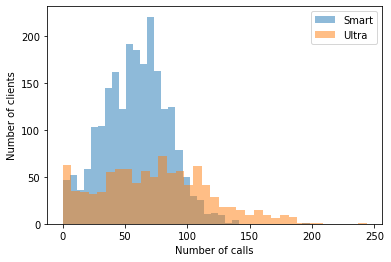

In [38]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of clients')
plt.show()

Now let's get a distribution of an average duration of call accross the two plans and months

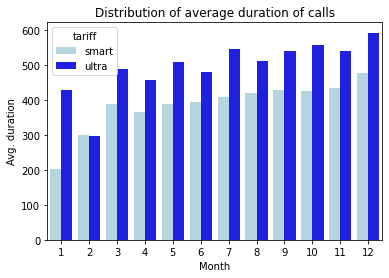

In [39]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of average duration of calls')
ax.set(xlabel='Month', ylabel='Avg. duration');

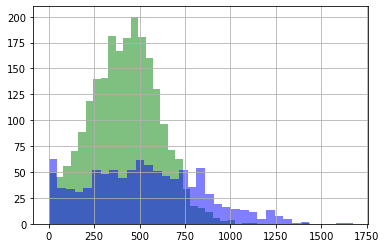

In [40]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

The average duration of calls for subscribers on the Ultra tariff plan is higher than that of subscribers on the Smart tariff plan. Over the course of the year, users of both tariff plans increase the average duration of their calls. The growth in the average call duration for Smart tariff subscribers is consistent throughout the year. However, Ultra tariff users do not exhibit such linear stability. It is worth noting that the lowest values were observed in February for subscribers of both tariff plans.

Now let's examine the distribution of the average number of messages across different tariff plans and months.

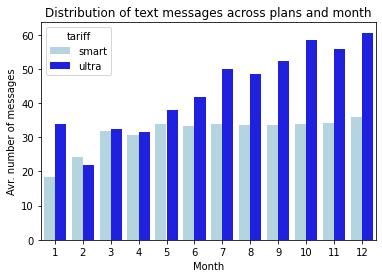

In [41]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of text messages across plans and month')
ax.set(xlabel='Month', ylabel='Avr. number of messages');

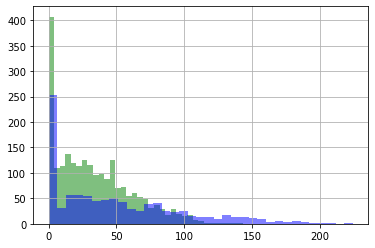

In [42]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

On average, users of the Ultra tariff plan send more messages, almost 20 messages more than users of the Smart tariff plan. The number of messages increases throughout the year for both tariff plans. The trend in message usage is similar to the trend in call duration: February shows the lowest number of messages sent during the year, and Ultra tariff users also exhibit nonlinear positive dynamics.

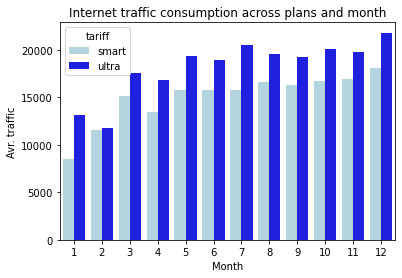

In [43]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Internet traffic consumption across plans and month')
ax.set(xlabel='Month', ylabel='Avr. traffic');

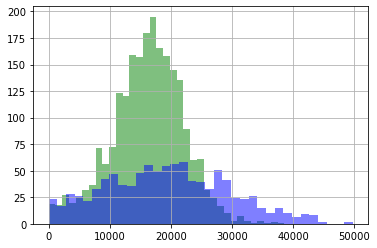

In [44]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

The least amount of internet usage by users was observed in January, February, and April. Subscribers on the Smart tariff plan tend to use 15-17 GB more frequently, while subscribers on the Ultra tariff plan tend to use 19-21 GB more frequently.

### Hypothesis testing

Hypothesis Testing (1) : Average revenue of "Ultra" and "Smart" tariff users are different.

`
H_0: The revenue (total_cost) of "Ultra" tariff users = the revenue (total_cost) of "Smart" tariff users.
H_a: The revenue (total_cost) of "Ultra" tariff users ≠ the revenue (total_cost) of "Smart" tariff users.
alpha = 0.05
`

In [45]:
smart_user_behavior=user_behavior.query('tariff=="smart"')
ultra_user_behavior=user_behavior.query('tariff=="ultra"')
results = st.ttest_ind(smart_user_behavior['total_cost'], ultra_user_behavior['total_cost'], equal_var = False)
alpha=.05
print(results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

4.2606313931076085e-250
We reject the null hypothesis.


Hypothesis Testing (2): Users from Moscow generate more revenue than users from other cities.


`
H_0: The revenue (total_cost) of users from Moscow = the revenue (total_cost) of users from other cities.
H_1: The revenue (total_cost) of users from Moscow ≠ the revenue (total_cost) of users from other cities.
alpha = 0.05
`

In [46]:
user_behavior_mow=user_behavior.query('city=="Москва"')
user_behavior_rus=user_behavior.query('city!="Москва"')

results = st.ttest_ind(user_behavior_mow['total_cost'], user_behavior_rus['total_cost'], equal_var = False)

alpha=.05
print(results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

0.5257376663729298
We fail to reject the null hypothesis.


## Conclusion

Based on the hypothesis testing conducted, we can draw the following conclusions:

- Average revenue between "Ultra" and "Smart" tariff users is found to be significantly different. We reject the null hypothesis, indicating that there is a statistically significant difference in revenue between the two tariff plans.
- However, regarding the hypothesis testing on revenue between users from Moscow and users from other cities, we fail to reject the null hypothesis. This suggests that there is not enough evidence to support the claim that users from Moscow generate significantly more revenue than users from other cities.

These conclusions highlight the importance of conducting hypothesis testing to make informed decisions based on statistical evidence. While the revenue difference between tariff plans was significant, the revenue difference between users from Moscow and users from other cities did not show statistical significance in our analysis.